In [3]:
from datasets import getNoduleInfoList
nodules = getNoduleInfoList(["zara"])

In [4]:
len(nodules), len(list(filter(lambda x: x.is_nodule, nodules)))

(289, 98)

In [2]:
nodule = nodules[-10]
image = nodule.image_type(nodule.file_path, nodule.center_lps)

In [32]:
from datasets import resample_image_to_thickness
import torch
import SimpleITK as sitk
raw_nodule = image.extract_fixed_size_nodule([65]*3, True)
resampled_nodule = resample_image_to_thickness(raw_nodule, [1]*3)
nodule_tensor = torch.from_numpy(sitk.GetArrayFromImage(resampled_nodule)).unsqueeze(0)

KeyboardInterrupt: 

In [ ]:
import monai
transform = monai.transforms.Resize(
        [128] * 3, mode="trilinear"
    )
res = transform(nodule_tensor)
res.shape

torch.Size([1, 128, 128, 128])

In [ ]:
from datasets import get_fixed_size_nodule
from datasets import getNoduleInfoList
nodules = getNoduleInfoList(["zara"])
# nodules = [nod for nod in nodules if "SC_002" in nod.file_path]
for nodule in nodules:
    get_fixed_size_nodule(
        nodule.file_path,
        nodule.image_type,
        nodule.center_lps,
        [50, 50 ,50],
        [50, 50, 50],
    )
    

/data/kaplinsp/envs/lminfer/lib/python3.10/site-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer


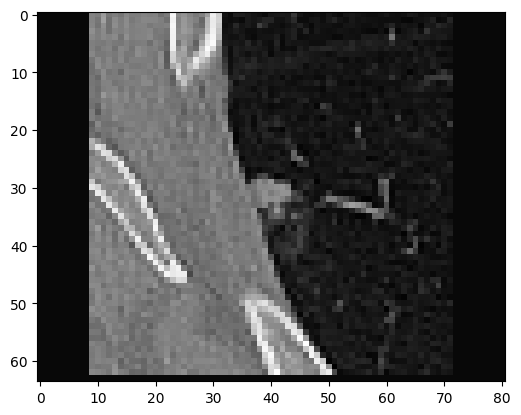

In [2]:
import matplotlib.pyplot as plt
plt.imshow(nodule[0][32], cmap="grey")

In [1]:
!pip install -q "monai[itk]"


In [ ]:
from monai.transforms import SpatialCrop 
import numpy as np 

import numpy as np
from monai.transforms import SpatialCrop, Spacing

def crop_roi_metatensor(img, center_mm, box_size_mm):
    """
    Crop a ROI in mm from a MONAI MetaTensor using spacing only.
    """
    spacing = np.array(img.meta["spacing"])  # (x,y,z)
    
    # Convert center mm -> voxel index
    center_idx = np.array(center_mm) / spacing  # (x,y,z)
    
    # Convert box size mm -> half size in voxels
    half_size = np.array(box_size_mm) / spacing / 2
    
    start = np.floor(center_idx - half_size).astype(int)
    end   = np.ceil(center_idx + half_size).astype(int)
    
    # Reverse for MONAI array order (C,Z,Y,X)
    start_zyx = start[::-1]
    end_zyx   = end[::-1]
    print(start_zyx, end_zyx)
    
    # Crop
    crop = SpatialCrop(roi_start=start_zyx, roi_end=end_zyx)
    roi = crop(img)
    
    return roi


In [ ]:
from datasets import getCtAugmentedNodule
from datasets import getNoduleInfoList, resample_image_to_thickness
from monai.transforms import LoadImage, SpatialCrop, Compose, Orientation
from monai.data.itk_torch_bridge import itk_image_to_metatensor
import matplotlib.pyplot as plt
nodules = [nod for nod in getNoduleInfoList(["zara"]) if 'SC_002' not in nod.file_path]
nod = nodules[50]
image = LoadImage("NrrdReader", ensure_channel_first=True)(nod.file_path)
transforms = Compose(
    Orientation("RAS")
)
image = transforms(image)
res = crop_roi_metatensor(image, nod.center_lps, (10,10,10))
print(res.shape)
plt.imshow(image[0][100], cmap="grey")


required package for reader NrrdReader is not installed, or the version doesn't match requirement.


NameError: name 'crop_roi_metatensor' is not defined

In [21]:
import numpy as np
sitk_image = nodule.image_type(nodule.file_path, nodule.center_lps)
origin = np.array(sitk_image.image.GetOrigin())

In [23]:
nodule.center_lps

(68.91515738008565, -20.57732693683081, -87.75000000000004)

In [12]:
image.meta

{'NRRD_kinds[0]': 'domain',
 'NRRD_kinds[1]': 'domain',
 'NRRD_kinds[2]': 'domain',
 'NRRD_space': 'left-posterior-superior',
 'spacing': array([0.970703, 0.970703, 1.25    ]),
 original_affine: array([[  -0.970703,    0.      ,    0.      ,  236.9     ],
        [   0.      ,   -0.970703,    0.      ,  248.5     ],
        [   0.      ,    0.      ,    1.25    , -332.5     ],
        [   0.      ,    0.      ,    0.      ,    1.      ]]),
 space: RAS,
 affine: tensor([[   0.9707,    0.0000,    0.0000, -259.1292],
         [   0.0000,    0.9707,    0.0000, -247.5292],
         [   0.0000,    0.0000,    1.2500, -332.5000],
         [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64),
 spatial_shape: array([512, 512, 263]),
 original_channel_dim: nan,
 'filename_or_obj': '/data/shastra1/Data_zara/SC_Zara/SC_053 .nrrd'}

In [10]:
from datasets import getCtAugmentedNodule
from datasets import getNoduleInfoList, resample_image_to_thickness
from monai.transforms import LoadImage, SpatialCrop, Compose, Orientation
from monai.data.itk_torch_bridge import itk_image_to_metatensor
import matplotlib.pyplot as plt
nodules = [nod for nod in getNoduleInfoList(["zara"]) if 'SC_002' not in nod.file_path]
nodule = nodules[2]
iamge = nodule.image_type(nodule.file_path, nodule.center_lps)
box = iamge.extract_fixed_size_nodule((50,50,50), True)
new = resample_image_to_thickness(box, (1,1,1))
print(box.GetSize(), box.GetSpacing())
print(new.GetSize(), new.GetSpacing())

(88, 88, 40) (0.5644530000000001, 0.5644530000000001, 1.2499999999999998)
(49, 49, 49) (1.0, 1.0, 1.0)


(0.7031249999999999, 0.7031249999999999, 1.2500000000000002) (512, 512, 254)
(1.0, 1.0, 1.0) (49, 49, 47)


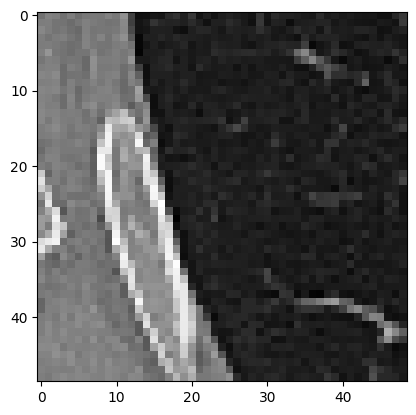

In [68]:
import SimpleITK as sitk
# sitk.GetArrayFromImage(raw_nodule).shape
print(ct.image.GetSpacing(), ct.image.GetSize())
print(raw_nodule.GetSpacing(), raw_nodule.GetSize())
plt.imshow(sitk.GetArrayFromImage(raw_nodule)[10], cmap="grey")

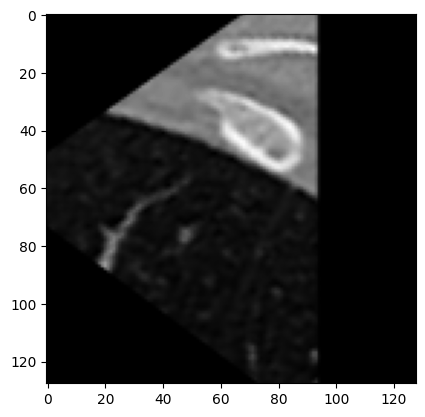